<a href="https://colab.research.google.com/github/kfahn22/computer-vision-course/blob/synthetic_data_creatiion/BlenderProc_pix3d_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to [BlenderProc](https://github.com/DLR-RM/BlenderProc) and [Pix3D](https://github.com/xingyuansun/pix3d)

Note: This notebook makes use of the [pix3d example](https://github.com/DLR-RM/BlenderProc/tree/main/examples/datasets/pix3d) which is available under `examples/datasets/pix3d`

In this notebook, we will see how can we quickly set up the BlenderProc environment inside Google Colab and how can we generate photorealistic data which can later be used for many different applications.

We firstly clone the official BlenderProc repo (repository) from GitHub using Git

In [1]:
!git clone https://github.com/DLR-RM/BlenderProc.git
%cd "BlenderProc"

Cloning into 'BlenderProc'...
remote: Enumerating objects: 43401, done.
remote: Counting objects: 100% (606/606), done.
remote: Compressing objects: 100% (305/305), done.
remote: Total 43401 (delta 367), reused 473 (delta 298), pack-reused 42795
Receiving objects: 100% (43401/43401), 90.59 MiB | 26.36 MiB/s, done.
Resolving deltas: 100% (32660/32660), done.
/content/BlenderProc


To be able to use the blenderproc command, we install it via pip:

In [2]:
!pip install -e .

Obtaining file:///content/BlenderProc
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for progressbar: filename=progressbar-2.5-py3-none-any.whl size=12067 sha256=feba96d508db60420353aa63a01a787984104ccf18369dd5c7f333eaf611742a
  Stored in directory: /root/.cache/pip/wheels/cd/17/e5/765d1a3112ff3978f70223502f6047e06c43a24d7c5f8ff95b
Successfully built progressbar
  Running setup.py develop for blenderproc


## Download pix3d dataset

Categories: ['bed', 'bookcase', 'chair', 'desk', 'misc', 'sofa', 'table', 'tool', 'wardrobe']

In [3]:
!wget http://pix3d.csail.mit.edu/data/pix3d.zip
!unzip pix3d.zip -d /content/pix3d_dir

#!rm pix3d.zip

Streaming output truncated to the last 5000 lines.
  inflating: /content/pix3d_dir/mask/sofa/0014.png  
  inflating: /content/pix3d_dir/mask/sofa/1654.png  
  inflating: /content/pix3d_dir/mask/sofa/1592.png  
  inflating: /content/pix3d_dir/mask/sofa/1235.png  
  inflating: /content/pix3d_dir/mask/sofa/0807.png  
  inflating: /content/pix3d_dir/mask/sofa/0475.png  
  inflating: /content/pix3d_dir/mask/sofa/0303.png  
  inflating: /content/pix3d_dir/mask/sofa/1931.png  
  inflating: /content/pix3d_dir/mask/sofa/1543.png  
  inflating: /content/pix3d_dir/mask/sofa/1122.png  
  inflating: /content/pix3d_dir/mask/sofa/1685.png  
  inflating: /content/pix3d_dir/mask/sofa/0762.png  
  inflating: /content/pix3d_dir/mask/sofa/0989.png  
  inflating: /content/pix3d_dir/mask/sofa/0958.png  
  inflating: /content/pix3d_dir/mask/sofa/1653.png  
  inflating: /content/pix3d_dir/mask/sofa/0013.png  
  inflating: /content/pix3d_dir/mask/sofa/0472.png  
  inflating: /content/pix3d_dir/mask/sofa/0800.p

The information about each instance is stored in a json file (img, category, 2d keypoints, img_source, model, etc.).  Use the following code to load it.  Run this cell if you want to check it out.

In [ ]:
# import json
# json.load(open('/content/pix3d_dir/pix3d.json'))

[{'img': 'img/bed/0001.png',
  'category': 'bed',
  'img_size': [395, 244],
  '2d_keypoints': [[[182.5, 147.09375],
    [174.5, 225.09375],
    [16.5, 111.09375],
    [-1.0, -1.0],
    [-1.0, -1.0],
    [324.5, 101.09375],
    [336.5, 51.09375],
    [226.5, 20.09375],
    [-1.0, -1.0],
    [352.5, 121.09375]],
   [[181.5, 165.09375],
    [181.5, 224.09375],
    [3.5, 112.09375],
    [5.5, 141.09375],
    [-1.0, -1.0],
    [352.5, 90.09375],
    [349.5, 34.09375],
    [196.5, 26.09375],
    [-1.0, -1.0],
    [346.5, 114.09375]],
   [[171.5, 139.09375],
    [175.5, 227.09375],
    [29.5, 90.09375],
    [-1.0, -1.0],
    [-1.0, -1.0],
    [340.5, 80.09375],
    [351.5, 32.09375],
    [198.5, 22.09375],
    [-1.0, -1.0],
    [268.5, 79.09375]]],
  'mask': 'mask/bed/0001.png',
  'img_source': 'ikea',
  'model': 'model/bed/IKEA_MALM_2/model.obj',
  'model_raw': None,
  'model_source': 'ikea',
  '3d_keypoints': 'model/bed/IKEA_MALM_2/3d_keypoints.txt',
  'voxel': 'model/bed/IKEA_MALM_2/voxel.

In order to run BlenderProc inside Google Colab, we first have to update the `LD_PRELOAD` environment variable

In [4]:
import os

os.environ["LD_PRELOAD"] = ""

!apt remove libtcmalloc-minimal4
!apt install libtcmalloc-minimal4

os.environ["LD_PRELOAD"] = "/usr/lib/x86_64-linux-gnu/libtcmalloc_minimal.so.4.5.9"

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following packages will be REMOVED:
  google-perftools libgoogle-perftools4 libtcmalloc-minimal4
0 upgraded, 0 newly installed, 3 to remove and 18 not upgraded.
After this operation, 1,817 kB disk space will be freed.
(Reading database ... 120874 files and directories currently installed.)
Removing google-perftools (2.9.1-0ubuntu3) ...
Removing libgoogle-perftools4:amd64 (2.9.1-0ubuntu3) ...
Removing libtcmalloc-minimal4:amd64 (2.9.1-0ubuntu3) ...
Processing triggers for man-db (2.10.2-1) ...
Processing triggers for libc-bin (2.35-0ubuntu3.1) ...
/sbin/ldconfig.real: /usr/local/lib/libtbbmalloc.so.2 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libtbbbind_2_0.so.3 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libtbbmalloc_proxy.so.2 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libtbb.so.12 is not a symbolic link

/sbin/ldconfig.real: /usr/local

To be able to use matplotlib inside BlenderProc, we have to install ipykernel inside blender's python environment. As this is the first blenderproc command, it will also install blender first:

In [6]:
!blenderproc pip install ipykernel --blender-install-path ./

Using blender in ./blender-3.5.1-linux-x64


Pix3d isn't on Hugging Face hub yet

Finally, we run the BlenderProc program using the blenderproc run along with required command line arguments. The first argument specifies the location of the python file that should be executed. The second argument corresponds to the camera pose file. In this case, we have specified two camera poses in the examples/basics/basic/camera_positions file. The third argument correponds to the output directory where our generated data will be stored. With the flag --blender-install-path, we specify the custom Blender install path which is necessary, as no user folder is availabe in colab.

In [7]:
!blenderproc  run /content/BlenderProc/examples/datasets/pix3d/main.py /content/pix3d_dir content/datasets/pix3d/output --blender-install-path ./
#!blenderproc pip install ipykernel run /content/BlenderProc/examples/datasets/pix3d/main.py /content/pix3d_dir content/datasets/pix3d/output --blender-install-path ./

Using blender in ./blender-3.5.1-linux-x64
Using temporary directory: /dev/shm/blender_proc_64b5eca3e2e248e384d814d34a368665
Blender 3.5.1 (hash e1ccd9d4a1d3 built 2023-04-24 23:31:15)
Installing pip package wheel None
Installing pip package wheel None
  Using cached wheel-0.41.2-py3-none-any.whl.metadata (2.2 kB)
Using cached wheel-0.41.2-py3-none-any.whl (64 kB)
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Installing pip package pyyaml 5.1.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.0/265.0 kB 9.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyyaml: filename=PyYAML-5.1.2-cp310-cp310-linux_x86_64.whl size=44116 sha256=22f658c8d43e85d7860455b64ebf4827cef5a1267b92fdecc6f98a46981a72a3
  Stored in directory: /root/.cache/pip/wheels/1c/77/3e/dcf9cc5e235189dedcf5f1736a14caaac20267a5bb846c8ce1
Successfully built pyyaml
Installing pip package imageio 2.9.0
     ━━━━━━━━━━━━━━━━━━━━━

## We visualize the first rendered color, depth and normal image which corresponds to the 0.hdf5 file inside the /content/BlenderProc/content/datasets/pix3d/output folder

/content/BlenderProc/content/datasets/pix3d/output/0.hdf5: 
Keys: 'colors': (512, 512, 3), 'depth': (512, 512), 'normals': (512, 512, 3)


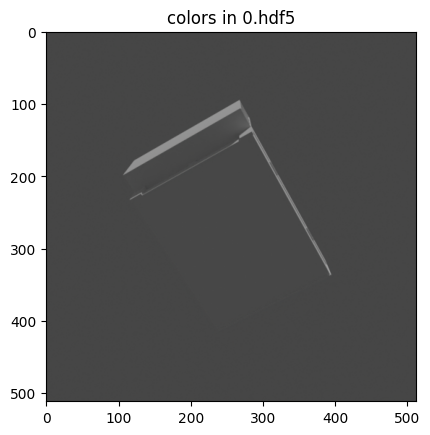

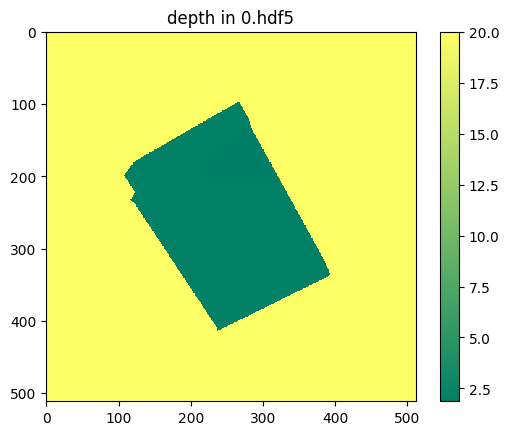

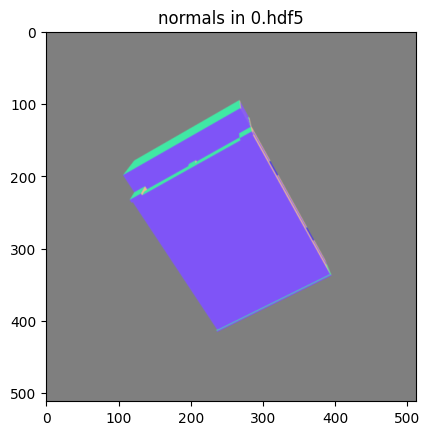

In [8]:
# visualize the generated data (0.hdf5)
%run "-m" "blenderproc" "vis" "hdf5" "/content/BlenderProc/content/datasets/pix3d/output/0.hdf5"

/content/BlenderProc/content/datasets/pix3d/output/1.hdf5: 
Keys: 'colors': (512, 512, 3), 'depth': (512, 512), 'normals': (512, 512, 3)


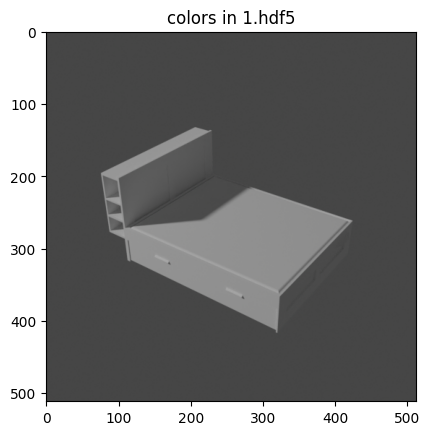

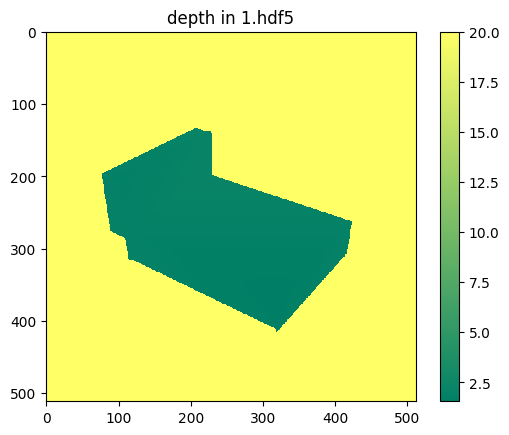

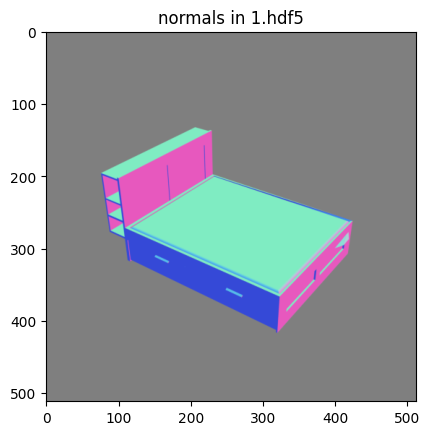

In [9]:
# visualize the generated data (1.hdf5)
%run "-m" "blenderproc" "vis" "hdf5" "/content/BlenderProc/content/datasets/pix3d/output/1.hdf5"

/content/BlenderProc/content/datasets/pix3d/output/2.hdf5: 
Keys: 'colors': (512, 512, 3), 'depth': (512, 512), 'normals': (512, 512, 3)


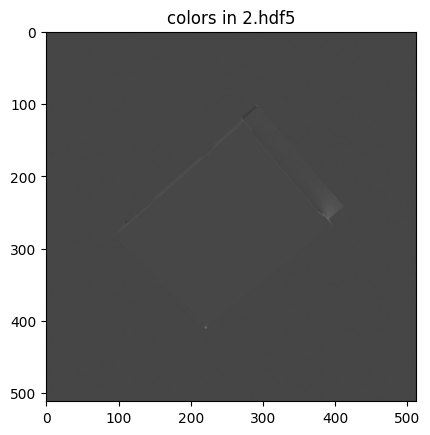

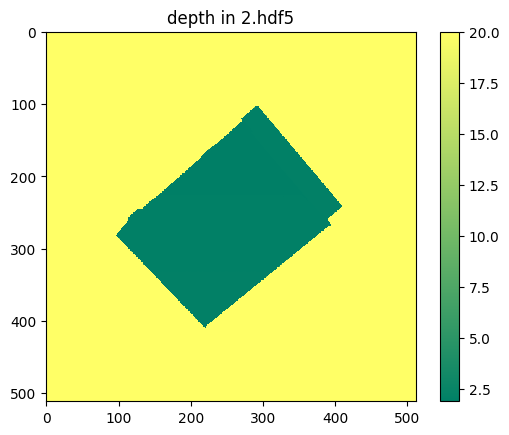

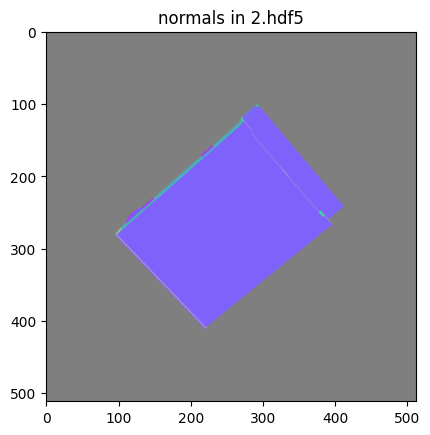

In [10]:
# visualize the generated data (2.hdf5)
%run "-m" "blenderproc" "vis" "hdf5" "/content/BlenderProc/content/datasets/pix3d/output/2.hdf5"

/content/BlenderProc/content/datasets/pix3d/output/3.hdf5: 
Keys: 'colors': (512, 512, 3), 'depth': (512, 512), 'normals': (512, 512, 3)


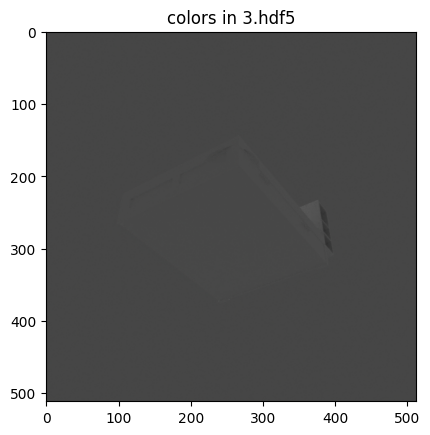

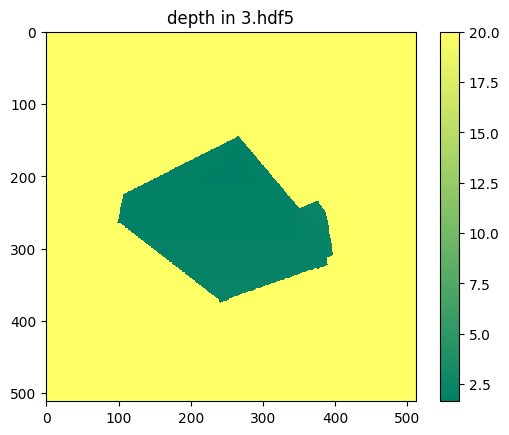

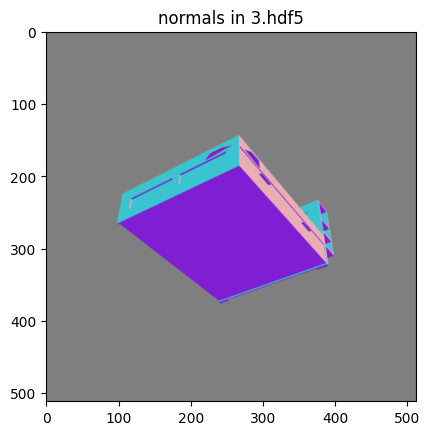

In [11]:
# visualize the generated data (3.hdf5)
%run "-m" "blenderproc" "vis" "hdf5" "/content/BlenderProc/content/datasets/pix3d/output/3.hdf5"

In [ ]:
# write the data to a .hdf5 container
#bproc.writer.write_hdf5(args.output_dir, data)
